In [154]:
## Data Cleaning

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
# loan_df = pd.read_csv('loan.csv', encoding = "ISO-8859-1", engine='python')
loan_df = pd.read_csv('loan.csv',encoding = "ISO-8859-1", low_memory=False)
loan_df.shape

(39717, 111)

In [157]:
# number of rows
loan_df['id'].count()

39717

In [158]:
# percentage of null values in each column
round(100 * loan_df.isnull().sum()/loan_df['id'].count())

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [159]:
# Removing columns that have more that 50% nulls
threshold_number = loan_df['id'].count()/2
loan_df = loan_df.loc[:, loan_df.isnull().sum(axis=0) <= threshold_number]
loan_df.shape

(39717, 54)

In [160]:
# Checking number of unique values in each column
loan_df.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [161]:
# Removing columns that has single value. Those columns will not give us any insights
loan_df = loan_df.loc[:, loan_df.nunique(axis=0) > 1]
loan_df.shape

(39717, 45)

In [162]:
loan_df.nunique().sort_values(ascending=False)

id                         39717
url                        39717
member_id                  39717
total_pymnt                37850
total_pymnt_inv            37518
total_rec_int              35148
last_pymnt_amnt            34930
emp_title                  28820
desc                       26527
revol_bal                  21711
title                      19615
installment                15383
funded_amnt_inv             8205
total_rec_prncp             7976
annual_inc                  5318
recoveries                  4040
dti                         2868
collection_recovery_fee     2616
total_rec_late_fee          1356
out_prncp_inv               1138
out_prncp                   1137
revol_util                  1089
funded_amnt                 1041
loan_amnt                    885
zip_code                     823
earliest_cr_line             526
int_rate                     371
last_credit_pull_d           106
last_pymnt_d                 101
total_acc                     82
issue_d   

In [163]:
# Checking data in the columns with low variation
loan_df['term'].value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [164]:
# converting term to int, as it's months
loan_df['term_months'] = loan_df['term'].str.lstrip().str.slice(stop=2).astype('int')

In [165]:
loan_df['term_months'].value_counts()

36    29096
60    10621
Name: term_months, dtype: int64

In [166]:
# dropping term column
loan_df = loan_df.drop('term', axis=1)

In [167]:
loan_df['term_months'].isnull().sum()

0

In [168]:
loan_df['pub_rec_bankruptcies'].value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [169]:
loan_df['pub_rec_bankruptcies'].isnull().sum()

697

In [170]:
# we dont want to be bias to bankruptcies. Removing rows with null values as it's safe to remove, since
# low percentage of null values
loan_df = loan_df[~loan_df['pub_rec_bankruptcies'].isnull()]

In [171]:
loan_df['loan_status'].value_counts()

Fully Paid     32371
Charged Off     5509
Current         1140
Name: loan_status, dtype: int64

In [172]:
loan_df['loan_status'].isnull().sum()

0

In [173]:
# percentage of null values in each column
round(100 * loan_df.isnull().sum()/loan_df['id'].count(),2)

id                          0.00
member_id                   0.00
loan_amnt                   0.00
funded_amnt                 0.00
funded_amnt_inv             0.00
int_rate                    0.00
installment                 0.00
grade                       0.00
sub_grade                   0.00
emp_title                   6.19
emp_length                  2.75
home_ownership              0.00
annual_inc                  0.00
verification_status         0.00
issue_d                     0.00
loan_status                 0.00
url                         0.00
desc                       33.15
purpose                     0.00
title                       0.03
zip_code                    0.00
addr_state                  0.00
dti                         0.00
delinq_2yrs                 0.00
earliest_cr_line            0.00
inq_last_6mths              0.00
open_acc                    0.00
pub_rec                     0.00
revol_bal                   0.00
revol_util                  0.13
total_acc 

In [174]:
# removing description as it's not significant
loan_df = loan_df.drop('desc', axis=1)

In [175]:
# removing rows with null values(as they are low in percentage):
# employee title, employee length, title, revol_util, last_pymnt_d
loan_df = loan_df[~loan_df['emp_title'].isnull()]
loan_df = loan_df[~loan_df['emp_length'].isnull()]
loan_df = loan_df[~loan_df['title'].isnull()]
loan_df = loan_df[~loan_df['revol_util'].isnull()]
loan_df = loan_df[~loan_df['last_pymnt_d'].isnull()]

In [176]:
# percentage of null values in each column
round(100 * loan_df.isnull().sum()/loan_df['id'].count(),2)

id                         0.0
member_id                  0.0
loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_title                  0.0
emp_length                 0.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
url                        0.0
purpose                    0.0
title                      0.0
zip_code                   0.0
addr_state                 0.0
dti                        0.0
delinq_2yrs                0.0
earliest_cr_line           0.0
inq_last_6mths             0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
revol_util                 0.0
total_acc                  0.0
out_prncp                  0.0
out_prncp_inv              0.0
total_py

In [177]:
loan_df.nunique().sort_values()

term_months                    2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
emp_length                    11
delinq_2yrs                   11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             510
zip_code                     806
loan_amnt                    863
funded_amnt                 1024
out_prncp                   1064
out_prncp_inv               1065
revol_util                  1082
total_rec_late_fee          1194
collection_recovery_fee     2386
dti                         2857
recoveries                  3585
annual_inc

In [178]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,term_months
1,1077430,1314167,2500,2500,2500.0,15.27%,59.83,C,C4,Ryder,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,60
3,1076863,1277178,10000,10000,10000.0,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,36
4,1075358,1311748,3000,3000,3000.0,12.69%,67.79,B,B5,University Medical Group,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,60
5,1075269,1311441,5000,5000,5000.0,7.90%,156.46,A,A4,Veolia Transportaton,...,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,36
6,1069639,1304742,7000,7000,7000.0,15.96%,170.08,C,C5,Southern Star Photography,...,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0,60


In [179]:
# int_rate and revol_util are percentage strings
loan_df['int_rate'] = loan_df['int_rate'].str.strip('%').astype('float')
loan_df['revol_util'] = loan_df['revol_util'].str.strip('%').astype('float')

In [180]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,term_months
1,1077430,1314167,2500,2500,2500.0,15.27,59.83,C,C4,Ryder,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,60
3,1076863,1277178,10000,10000,10000.0,13.49,339.31,C,C1,AIR RESOURCES BOARD,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,36
4,1075358,1311748,3000,3000,3000.0,12.69,67.79,B,B5,University Medical Group,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,60
5,1075269,1311441,5000,5000,5000.0,7.90,156.46,A,A4,Veolia Transportaton,...,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,36
6,1069639,1304742,7000,7000,7000.0,15.96,170.08,C,C5,Southern Star Photography,...,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0,60


In [181]:
# emp_length can be numeric as well
loan_df['emp_length'].value_counts()

10+ years    8407
2 years      4178
< 1 year     4052
3 years      3914
4 years      3297
5 years      3129
1 year       3026
6 years      2121
7 years      1697
8 years      1405
9 years      1207
Name: emp_length, dtype: int64

In [182]:
# can give values 0 to 10: 0 for < 1 year, 10, for 10+
# using replace method on dataframe
replace_dict = {
    '10+ years': 10,
    '2 years': 2,
    '< 1 year': 0,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '1 year': 1,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9
}
loan_df = loan_df.replace({"emp_length": replace_dict })
loan_df['emp_length'].value_counts()

10    8407
2     4178
0     4052
3     3914
4     3297
5     3129
1     3026
6     2121
7     1697
8     1405
9     1207
Name: emp_length, dtype: int64

In [183]:
# object date columns: last_pymnt_d, last_credit_pull_d, earliest_cr_line, issue_d
# converting them to datetime columns
loan_df['last_pymnt_d'] = pd.to_datetime(loan_df['last_pymnt_d'], format='%b-%y')
loan_df['last_credit_pull_d'] = pd.to_datetime(loan_df['last_credit_pull_d'], format='%b-%y')
loan_df['earliest_cr_line'] = pd.to_datetime(loan_df['earliest_cr_line'], format='%b-%y')
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'], format='%b-%y')

loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 44 columns):
id                         36433 non-null int64
member_id                  36433 non-null int64
loan_amnt                  36433 non-null int64
funded_amnt                36433 non-null int64
funded_amnt_inv            36433 non-null float64
int_rate                   36433 non-null float64
installment                36433 non-null float64
grade                      36433 non-null object
sub_grade                  36433 non-null object
emp_title                  36433 non-null object
emp_length                 36433 non-null int64
home_ownership             36433 non-null object
annual_inc                 36433 non-null float64
verification_status        36433 non-null object
issue_d                    36433 non-null datetime64[ns]
loan_status                36433 non-null object
url                        36433 non-null object
purpose                    36433 non-null object
ti

In [184]:
# splitting of month and year on issue date
loan_df['issue_d_month'] = loan_df['issue_d'].dt.month
loan_df['issue_d_year'] = loan_df['issue_d'].dt.year

In [185]:

loan_df.shape

(36433, 46)

In [186]:
# saving cleaned up file for analysis
loan_df.to_csv('processed_loan.csv', encoding='utf-8', index=False)

### Data Analysis

In [187]:
df = pd.read_csv('processed_loan.csv')
df.shape

(36433, 46)

In [188]:
# Listing Consumer behaviour columns
behaviour_columns = ['last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'delinq_2yrs', 
                     'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
                    'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
                    'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
                    'recoveries', 'collection_recovery_fee']
# Listing usued columns for analysis
unused_columns = ['zip_code', 'addr_state', 'url']
to_drop_columns = behaviour_columns + unused_columns

In [189]:
# droping usused columns
df = df.drop(to_drop_columns, axis=1)
df.shape

(36433, 23)

In [190]:
df['loan_status'].value_counts()

Fully Paid     30424
Charged Off     4943
Current         1066
Name: loan_status, dtype: int64

In [191]:
# keeping the original column before converting to numeric
df['loan_status_raw'] = df['loan_status']

In [192]:
df['loan_status_raw']

0        Charged Off
1         Fully Paid
2            Current
3         Fully Paid
4         Fully Paid
            ...     
36428     Fully Paid
36429     Fully Paid
36430    Charged Off
36431    Charged Off
36432     Fully Paid
Name: loan_status_raw, Length: 36433, dtype: object

In [193]:
# Filtering only Fully Paid and Charged Off loans, converting them to numeric
df = df.loc[df['loan_status'] != 'Current', :]
df['loan_status'] = df['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)
df['loan_status']

0        1
1        0
3        0
4        0
5        0
        ..
36428    0
36429    0
36430    1
36431    1
36432    0
Name: loan_status, Length: 35367, dtype: int64

In [194]:
df['loan_status'].value_counts()

0    30424
1     4943
Name: loan_status, dtype: int64

#### The aim is to identify patterns which indicate if a person is likely to default
EDA to understand how consumer attributes and loan attributes influence the tendency of default. <br>
Consumer behaviour might be irrelevant for our analysis. <br>
Target column will be loan_status = 'Fully Paid' or 'Charged Off'.

In [195]:
df['loan_status'].describe()

count    35367.000000
mean         0.139763
std          0.346746
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: loan_status, dtype: float64

Around 14% of the loans are charged off

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35367 entries, 0 to 36432
Data columns (total 24 columns):
id                      35367 non-null int64
member_id               35367 non-null int64
loan_amnt               35367 non-null int64
funded_amnt             35367 non-null int64
funded_amnt_inv         35367 non-null float64
int_rate                35367 non-null float64
installment             35367 non-null float64
grade                   35367 non-null object
sub_grade               35367 non-null object
emp_title               35367 non-null object
emp_length              35367 non-null int64
home_ownership          35367 non-null object
annual_inc              35367 non-null float64
verification_status     35367 non-null object
issue_d                 35367 non-null object
loan_status             35367 non-null int64
purpose                 35367 non-null object
title                   35367 non-null object
dti                     35367 non-null float64
pub_rec_bankruptci

In [197]:
# id and member_id are insignificant columns. can remove them.
# title can be ignored too as purpose column drives our analysis better
df = df.drop(['id', 'member_id', 'title'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35367 entries, 0 to 36432
Data columns (total 21 columns):
loan_amnt               35367 non-null int64
funded_amnt             35367 non-null int64
funded_amnt_inv         35367 non-null float64
int_rate                35367 non-null float64
installment             35367 non-null float64
grade                   35367 non-null object
sub_grade               35367 non-null object
emp_title               35367 non-null object
emp_length              35367 non-null int64
home_ownership          35367 non-null object
annual_inc              35367 non-null float64
verification_status     35367 non-null object
issue_d                 35367 non-null object
loan_status             35367 non-null int64
purpose                 35367 non-null object
dti                     35367 non-null float64
pub_rec_bankruptcies    35367 non-null float64
term_months             35367 non-null int64
issue_d_month           35367 non-null int64
issue_d_year     

### Univariate analysis

In [198]:
# crosstab between loan status and grade
pd.crosstab(df.grade, df.loan_status_raw, margins=True, margins_name="Total", normalize="index")

loan_status_raw,Charged Off,Fully Paid
grade,,
A,0.056127,0.943873
B,0.116906,0.883094
C,0.162930,0.837070
D,0.210165,0.789835
E,0.261185,0.738815
F,0.317073,0.682927
G,0.329787,0.670213
Total,0.139763,0.860237


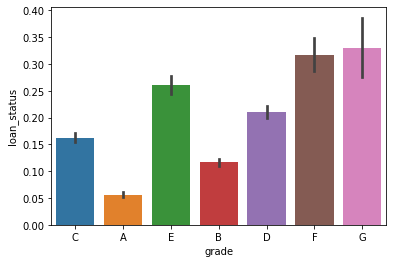

In [199]:
# bar plot on categorical variable : grade
sns.barplot(x='grade', y='loan_status', data=df)
plt.show()

Grade E 26%, F 31% and G 32.9% are TOP 3 defaulters.

In [200]:
# crosstab between month term and loan status. Showing percentage of defaults
pd.crosstab(df.term_months, df.loan_status_raw, margins=True, margins_name="Total", normalize="index")

loan_status_raw,Charged Off,Fully Paid
term_months,,
36,0.103499,0.896501
60,0.246162,0.753838
Total,0.139763,0.860237


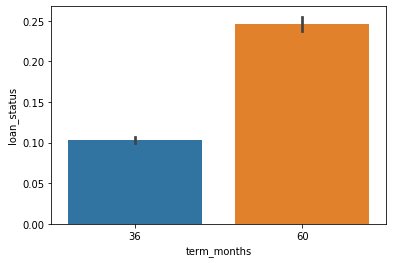

In [201]:
# bar plot on categorical variable : term_months
sns.barplot(x='term_months', y='loan_status', data=df)
plt.show()

Overall 60 months loan term tends to default more than twice as compared to 36 months.

In [202]:
# crosstab between loan status and issue year
pd.crosstab(df.loan_status_raw, df.issue_d_year, margins=True, margins_name="Total")

issue_d_year,2007,2008,2009,2010,2011,Total
loan_status_raw,,,,,,
Charged Off,2,160,541,1309,2931,4943
Fully Paid,4,893,3882,9486,16159,30424
Total,6,1053,4423,10795,19090,35367


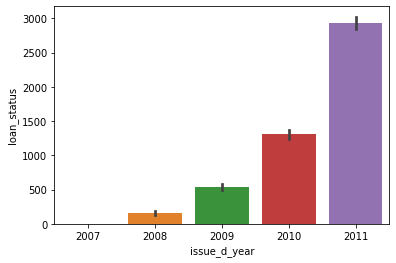

In [203]:
## bar plot on categorical variable : issue_d_year
sns.barplot(x='issue_d_year', y='loan_status', data=df, estimator=sum)
plt.show()

There's an increase in default rate over the years.

In [204]:
# crosstab between purpose and loan_status
pd.crosstab(df.purpose, df.loan_status_raw, margins=True, margins_name="Total", normalize="index")

loan_status_raw,Charged Off,Fully Paid
purpose,,
car,0.106810,0.893190
credit_card,0.103545,0.896455
debt_consolidation,0.148365,0.851635
educational,0.163043,0.836957
home_improvement,0.113236,0.886764
house,0.157576,0.842424
major_purchase,0.096300,0.903700
medical,0.152733,0.847267
moving,0.151052,0.848948


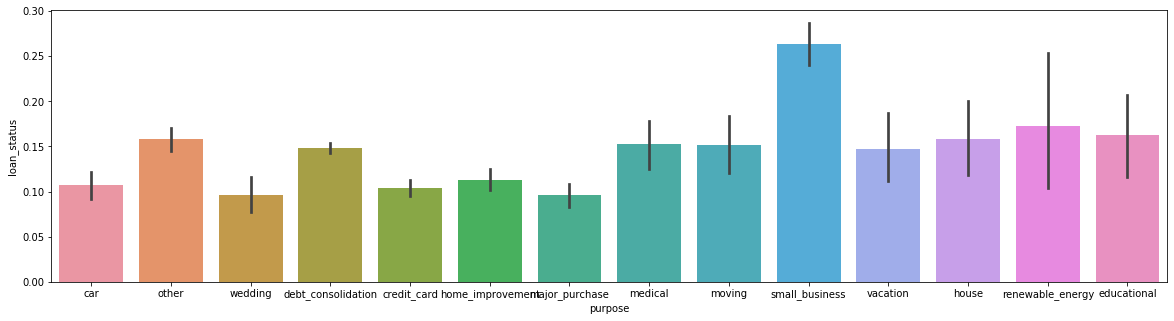

In [205]:
## bar plot on categorical variable : purpose
plt.figure(figsize=(20,5))
sns.barplot(x='purpose', y='loan_status', data=df)
plt.show()

Clients having small_business as purpose defaults the most followed by renewable_energy and house.

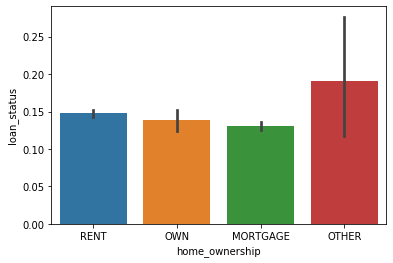

In [206]:
## bar plot on categorical variable : home_ownership
sns.barplot(x='home_ownership', y='loan_status', data=df)
plt.show()

Clients having OTHER as home ownership could be considered under High Risk Category.

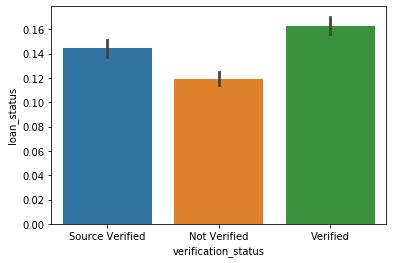

In [207]:
## bar plot on categorical variable : verification_status
sns.barplot(x='verification_status', y='loan_status', data=df)
plt.show()

Verified loans defaults the most. It shows the company didn't do due-dilligence while verifying their clients.

In [208]:
pd.crosstab(df.loan_status_raw, df.emp_length, margins=True, margins_name="Total", normalize="index")

emp_length,0,1,2,3,4,5,6,7,8,9,10
loan_status_raw,,,,,,,,,,,
Charged Off,0.107222,0.082541,0.107020,0.105402,0.086385,0.085373,0.058062,0.050172,0.038641,0.029739,0.249444
Fully Paid,0.113332,0.083848,0.116816,0.108861,0.091342,0.086149,0.058342,0.045688,0.038456,0.033822,0.223343
Total,0.112478,0.083666,0.115447,0.108378,0.090649,0.086041,0.058303,0.046314,0.038482,0.033251,0.226991


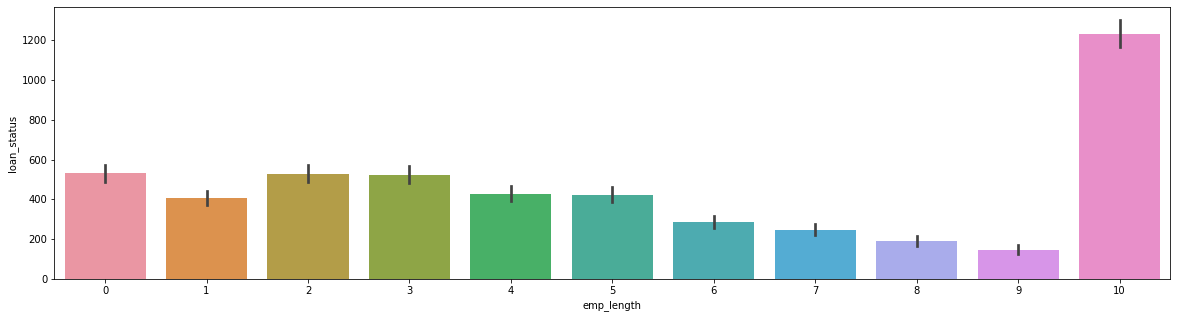

In [209]:
## bar plot on categorical variable : emp_length
plt.figure(figsize=(20,5))
sns.barplot(x='emp_length', y='loan_status', data=df, estimator=sum)
plt.show()

Most stable employees tend to default most. Employment length is not much of a differentiator between 0 to 5 yrs

In [210]:
df['int_rate'].describe()

count    35367.000000
mean        11.983468
std          3.702512
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64

In [211]:
# binning int_rate
df['int_rate_bin'] = pd.cut(df['int_rate'], 
                                [0,5,10,15,20,25,30], 
                                labels=['0-5','5-10','10-15','15-20','20-25','25-30'])
df['int_rate_bin'].value_counts()

10-15    16769
5-10     11101
15-20     6769
20-25      728
25-30        0
0-5          0
Name: int_rate_bin, dtype: int64

In [212]:
pd.crosstab(df.purpose, df.int_rate_bin, margins=True, margins_name="Total", normalize="index").apply(lambda r: round(100*(r/r.sum())), axis=1)

int_rate_bin,5-10,10-15,15-20,20-25
purpose,,,,
car,47.0,40.0,12.0,0.0
credit_card,34.0,49.0,16.0,2.0
debt_consolidation,27.0,49.0,22.0,3.0
educational,27.0,64.0,9.0,0.0
home_improvement,39.0,44.0,16.0,2.0
house,32.0,41.0,23.0,3.0
major_purchase,44.0,42.0,14.0,1.0
medical,35.0,46.0,17.0,1.0
moving,35.0,47.0,16.0,2.0


<function matplotlib.pyplot.show(*args, **kw)>

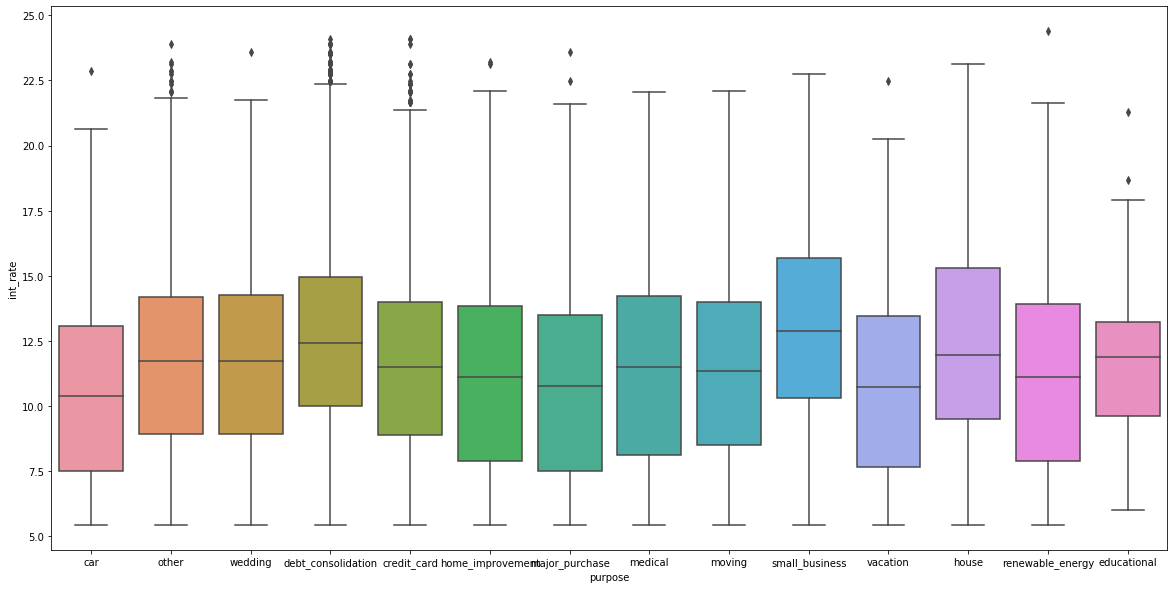

In [213]:
# Box plot between the loan purpose and interest rate offered
plt.figure(figsize=(20, 10))
sns.boxplot(x='purpose', y='int_rate', data=df)
plt.show

Small Business, House and Debt Consolidation are considered as high risk loan purpose and hence offered more interest rates.

#### Binning continuous variables

In [214]:
# Continuous variable: annual_inc
df['annual_inc_raw'] = df['annual_inc']
df['annual_inc'].describe().astype('int')

count      35367
mean       69095
std        63967
min         4000
25%        41500
50%        60000
75%        82500
max      6000000
Name: annual_inc, dtype: int64

standard deviation is apprx equal to mean, which means it has outliers

In [215]:
# binning annual income
def annual_inc(inc):
    if inc <= 50000:
        return 'low'
    elif inc > 50000 and inc <=100000:
        return 'medium'
    elif inc > 100000 and inc <=150000:
        return 'high'
    else:
        return 'very high'

df['annual_inc'] = df['annual_inc'].apply(lambda x: annual_inc(x))
df['annual_inc'].value_counts()

medium       16625
low          13721
high          3709
very high     1312
Name: annual_inc, dtype: int64

In [216]:
pd.crosstab(df.annual_inc, df.loan_status_raw, margins=True, margins_name="Total")

loan_status_raw,Charged Off,Fully Paid,Total
annual_inc,,,
high,391,3318,3709
low,2229,11492,13721
medium,2184,14441,16625
very high,139,1173,1312
Total,4943,30424,35367


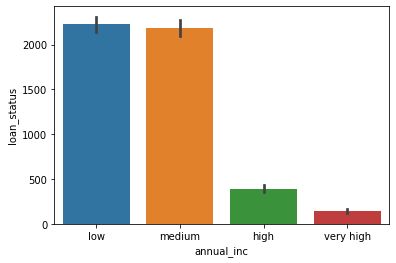

In [217]:
## bar plot on categorical variable : annual_inc
sns.barplot(x='annual_inc', y='loan_status', data=df, estimator=sum)
plt.show()

clearly shows, low incomes has high default rates. Followed by Medium income earners.

<function matplotlib.pyplot.show(*args, **kw)>

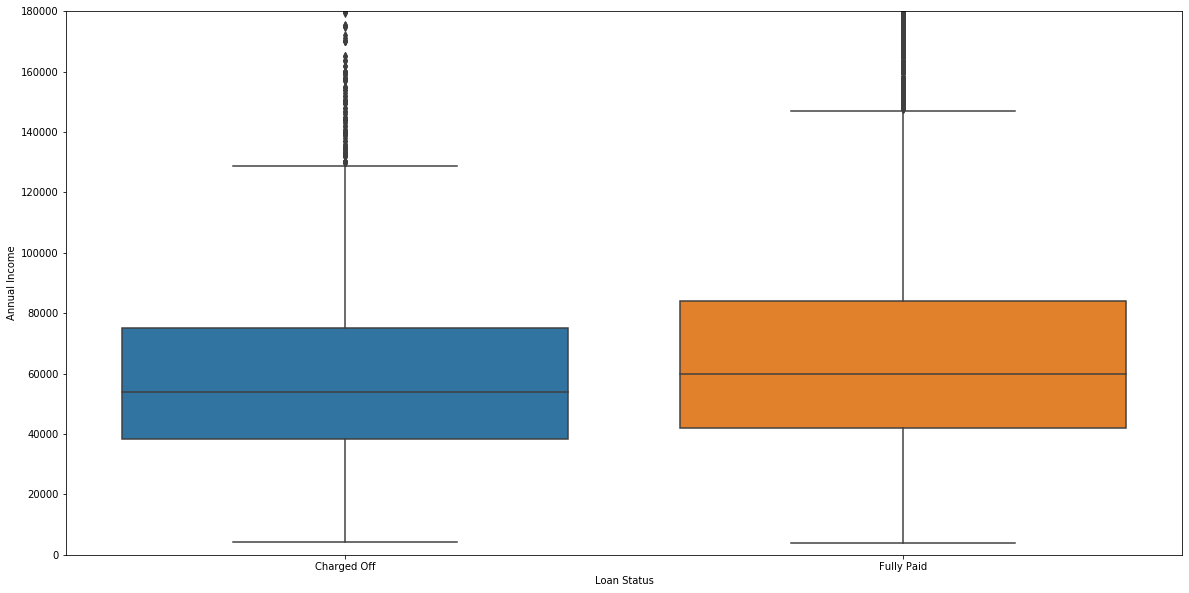

In [218]:
# box plot on annual income variable: annual_inc
plt.figure(figsize=(20, 10))
plt.ylim(0, 180000)
ax=sns.boxplot(x='loan_status_raw', y='annual_inc_raw', data = df)
ax.set(xlabel='Loan Status', ylabel='Annual Income')
plt.show

It has been observed people earning as little as $4000 have been offered loans.

In [219]:
df['loan_amnt'].describe().astype('int')

count    35367
mean     11133
std       7326
min        500
25%       5500
50%      10000
75%      15000
max      35000
Name: loan_amnt, dtype: int64

In [220]:
# binning loan_amnt
def loan_amnt(amt):
    if amt <= 5500:
        return 'low'
    elif amt > 5500 and amt <=10000:
        return 'medium'
    elif amt > 10000 and amt <=15000:
        return 'high'
    else:
        return 'very high'

df['loan_amnt_bin'] = df['loan_amnt'].apply(lambda x: loan_amnt(x))
df['loan_amnt_bin'].value_counts()

medium       11241
low           8939
very high     7987
high          7200
Name: loan_amnt_bin, dtype: int64

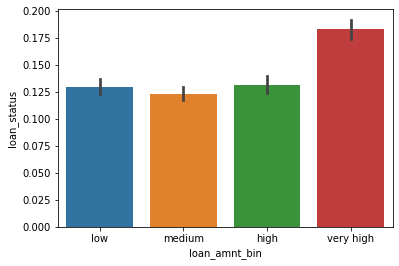

In [228]:
## bar plot on categorical variable : loan_amnt_bin
sns.barplot(x='loan_amnt_bin', y='loan_status', data=df)
plt.show()

Very high and high amount loans tend to have more defaulters

In [229]:
df['dti'].describe()

count    35367.000000
mean        13.403961
std          6.636540
min          0.000000
25%          8.320000
50%         13.500000
75%         18.640000
max         29.990000
Name: dti, dtype: float64

In [230]:
# binning debt to income ratio
df['dti_bin'] = pd.cut(df['dti'], 
                                [0,5,10,15,20,25,30], 
                                labels=['0-5','5-10','10-15','15-20','20-25','25-30'])
df['dti_bin'].value_counts()

10-15    8901
15-20    8170
5-10     7125
20-25    6164
0-5      4292
25-30     575
Name: dti_bin, dtype: int64

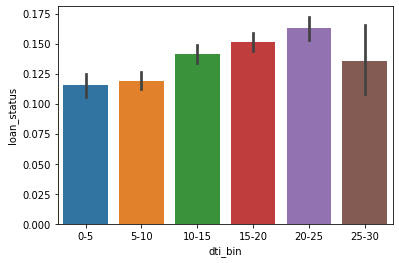

In [231]:
## bar plot on categorical variable : dti_bin
sns.barplot(x='dti_bin', y='loan_status', data=df)
plt.show()

Most of the defaulters have debt to income ratio between 20 to 25 %

In [225]:
pd.crosstab(df.pub_rec_bankruptcies, df.loan_status_raw, margins=True, margins_name="Total")

loan_status_raw,Charged Off,Fully Paid,Total
pub_rec_bankruptcies,,,
0.0,4630,29268,33898
1.0,311,1153,1464
2.0,2,3,5
Total,4943,30424,35367


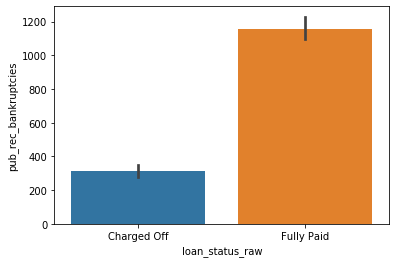

In [226]:
## bar plot on categorical variable : loan_amnt_bin
sns.barplot(x='loan_status_raw', y='pub_rec_bankruptcies', data=df, estimator=sum)
plt.show()

It's understood, defaulters are the ones who do not have bankruptcies, and then become defaulters

### Bivariate analysis

In [227]:
# target column: loan_status
defaulter_df = df.loc[df['loan_status'] == 1, :]
paid_df = df.loc[df['loan_status'] == 0, :]

In [903]:
# continuous - continuous: loan_amnt, int_rate
defaulter_df['int_rate'].corr(defaulter_df['loan_amnt'])

0.34942893160161

In [904]:
df['int_rate'].corr(df['loan_amnt'])

0.2999970721982265

In [905]:
paid_df['int_rate'].corr(paid_df['loan_amnt'])

0.28382252224161125

Fully paid loans, Charged Off loans, have low positive correlation, bigger loan amounts less likely to attract bigger interest rates

In [906]:
# continuous - continuous: loan_amnt, dti
defaulter_df['dti'].corr(defaulter_df['loan_amnt'])

0.07075193434980892

In [907]:
paid_df['dti'].corr(paid_df['loan_amnt'])

0.05858501652362025

In [908]:
df[['dti', 'loan_amnt']].corr()

,dti,loan_amnt
dti,1.000000,0.063093
loan_amnt,0.063093,1.000000


Debt to Income ratio has almost no impact on request loan amount

#### Grade and Purpose

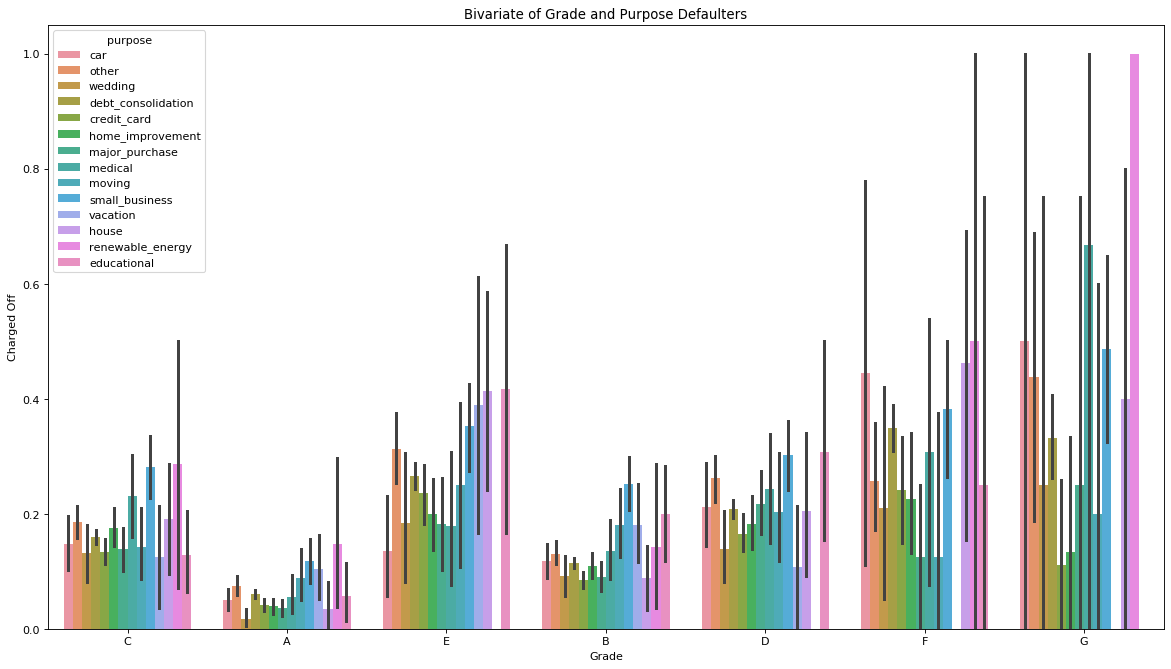

In [959]:
# bar plot on categorical variable : grade
# set figure size for larger figure
plt.figure(num=None, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
# specify hue="pupose"
sns.barplot(x='grade', y='loan_status', hue="purpose", data=df)
plt.title('Bivariate of Grade and Purpose Defaulters')
plt.xlabel('Grade')
plt.ylabel('Charged Off')
plt.show()

The Top Purpose among Top default rate Grades are

Grade: G
1. Renewable energy
2. Home Improvement
3. Small Business

Grade: F
1. Renewable Energy
2. House
3. Car

#### Annual Income and Purpose

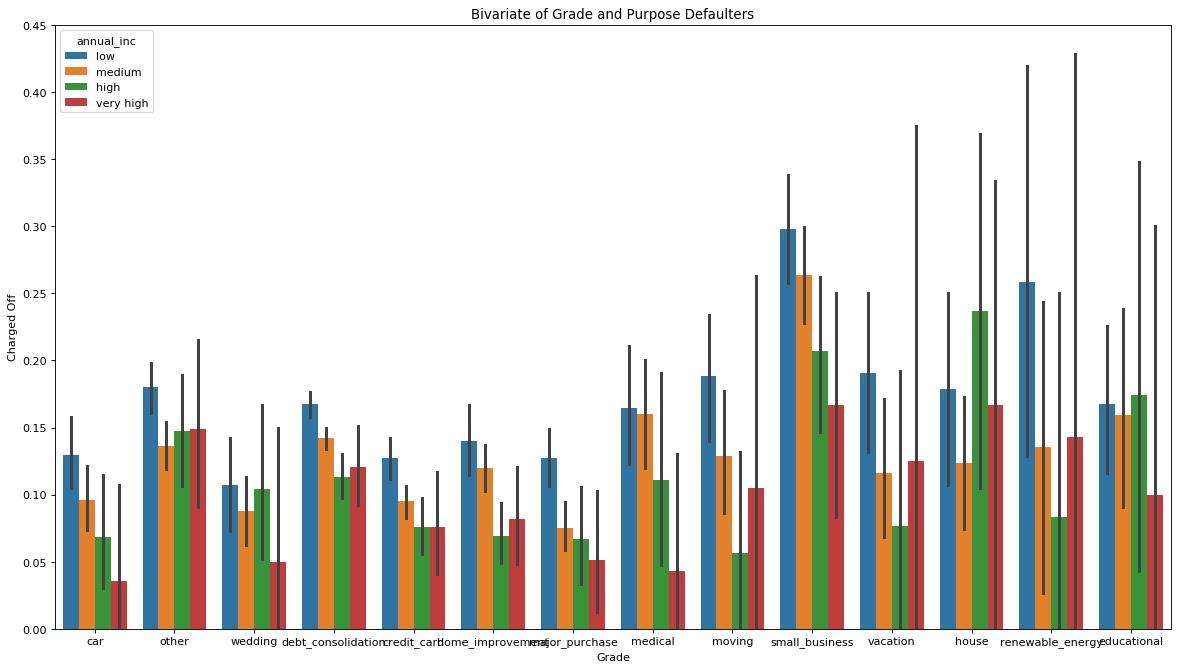

In [967]:
# bar plot on categorical variable : annual_inc
# set figure size for larger figure
plt.figure(num=None, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
# specify hue="pupose"
sns.barplot(x='purpose', y='loan_status', hue="annual_inc", data=df)
plt.title('Bivariate of Annual Income and Purpose Defaulters')
plt.xlabel('Grade')
plt.ylabel('Charged Off')
plt.show()

Top purposes among Income Groups 
Low, Medium and High are
1. Small Business
2. Renewable Energy
3. House

#### Annual Income and Month Terms

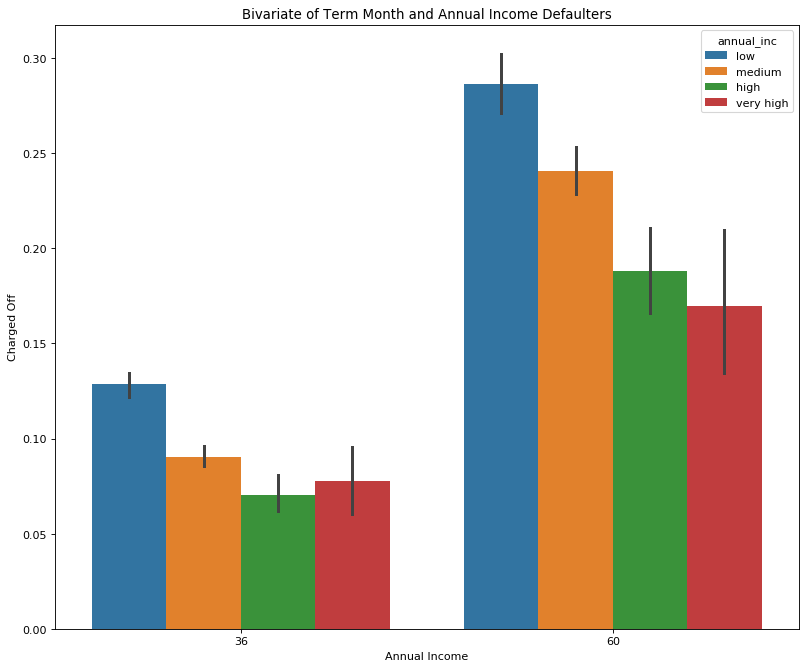

In [233]:
# bar plot on categorical variable : grade
# set figure size for larger figure
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
# specify hue="pupose"
sns.barplot(x='term_months', y='loan_status', hue="annual_inc", data=df)
plt.title('Bivariate of Term Month and Annual Income Defaulters')
plt.xlabel('Annual Income')
plt.ylabel('Charged Off')
plt.show()

The default rate is high for all income groups in 60 month  term. Low income group tops in both groups.

#### Purpose and Employment Length

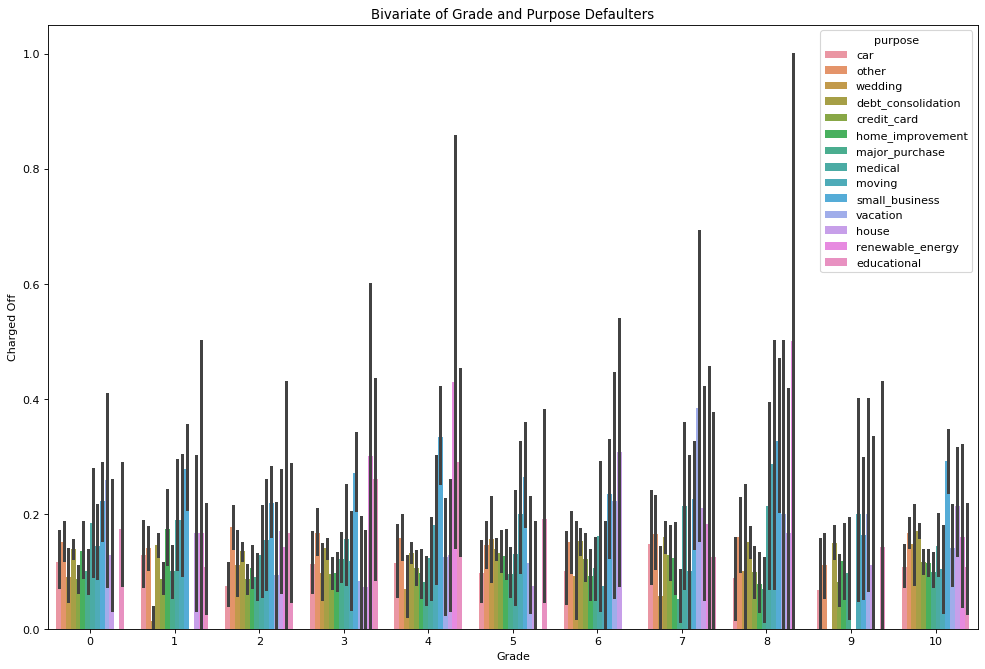

In [936]:
# bar plot on categorical variable : purpose and emp_length
# set figure size for larger figure
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
# specify hue="emp_length"
sns.barplot(x='emp_length', y='loan_status', hue="purpose", data=df)
plt.title('Bivariate of Grade and Purpose Defaulters')
plt.xlabel('Grade')
plt.ylabel('Charged Off')
plt.show()

Most stable job applicants have high debt consolidation with maximum defaulters

#### Purpose and Issue Year

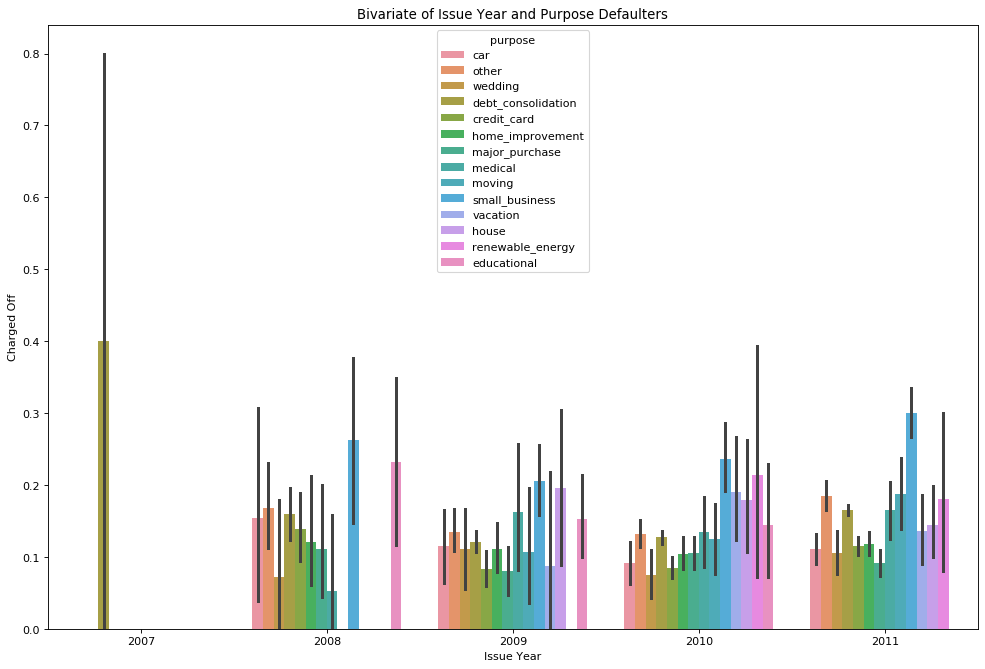

In [937]:
# bar plot on categorical variable : purpose and Issue Year
# set figure size for larger figure
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
# specify hue="emp_length"
sns.barplot(x='issue_d_year', y='loan_status', hue="purpose", data=df)
plt.title('Bivariate of Issue Year and Purpose Defaulters')
plt.xlabel('Issue Year')
plt.ylabel('Charged Off')
plt.show()

Small Businesses are the Top defaulters from 2007 to 2011.

<function matplotlib.pyplot.show(*args, **kw)>

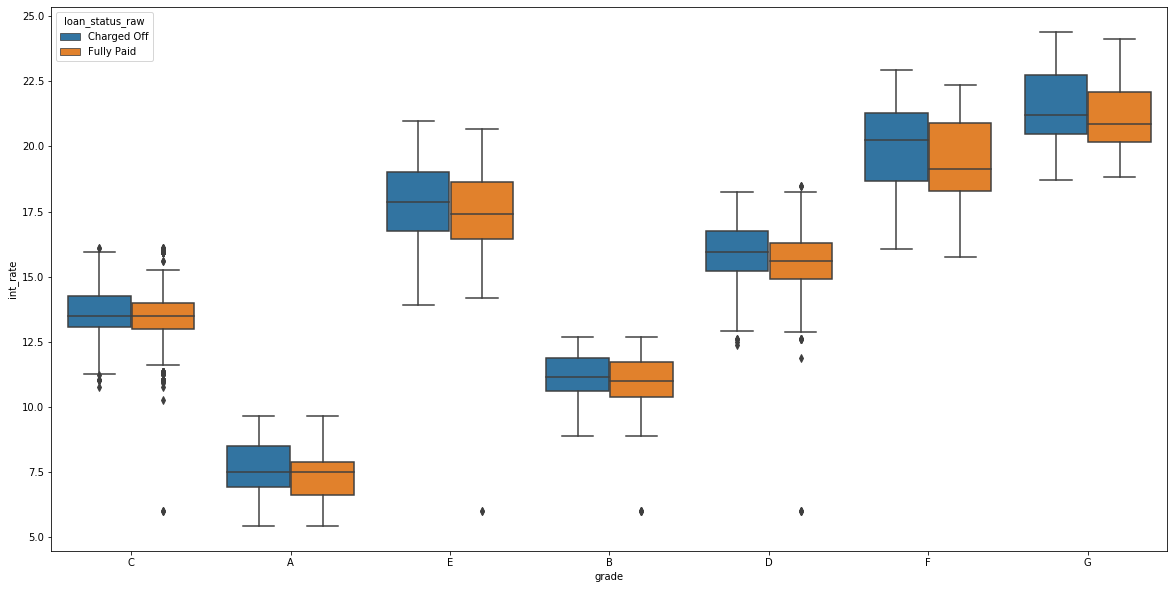

In [970]:
# Box plot for Grade and interest rate against default rate
plt.figure(figsize=(20, 10))
sns.boxplot(x='grade', y='int_rate', hue='loan_status_raw', data=df)
plt.show

The applicats which have low grades are offered high interest rates. F and G grade applicats are offered 20% or more interst rates.

In [962]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35367 entries, 0 to 36432
Data columns (total 25 columns):
loan_amnt               35367 non-null int64
funded_amnt             35367 non-null int64
funded_amnt_inv         35367 non-null float64
int_rate                35367 non-null float64
installment             35367 non-null float64
grade                   35367 non-null object
sub_grade               35367 non-null object
emp_title               35367 non-null object
emp_length              35367 non-null int64
home_ownership          35367 non-null object
annual_inc              35367 non-null object
verification_status     35367 non-null object
issue_d                 35367 non-null object
loan_status             35367 non-null int64
purpose                 35367 non-null object
dti                     35367 non-null float64
pub_rec_bankruptcies    35367 non-null float64
term_months             35367 non-null int64
issue_d_month           35367 non-null int64
issue_d_year      

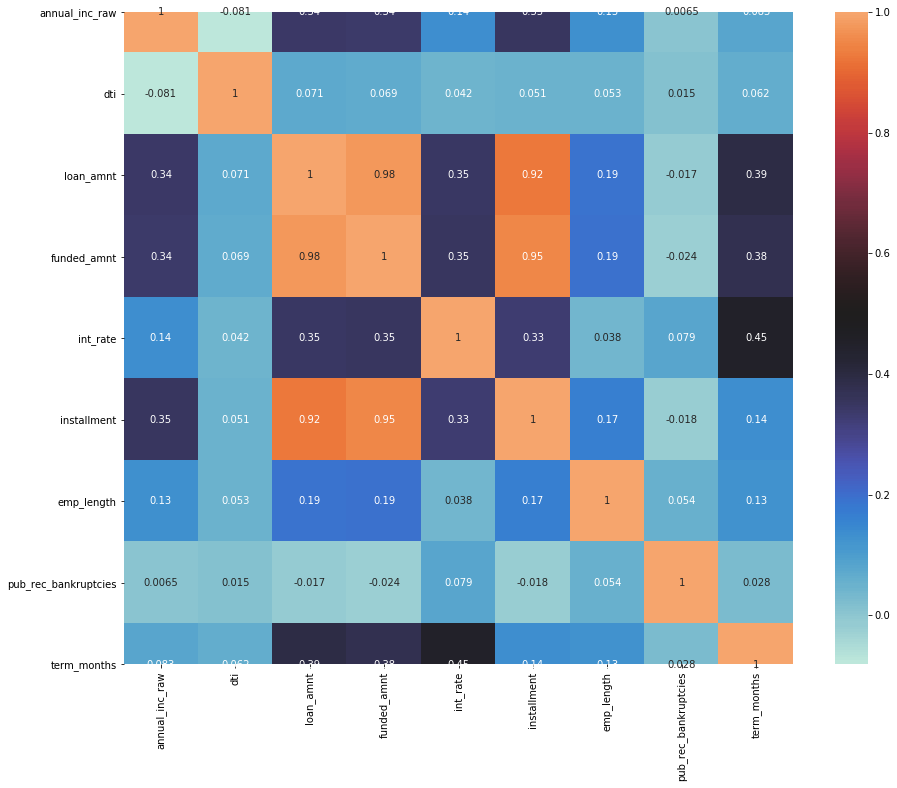

In [963]:
# heatmap of continuous variables for Defaulters
plt.figure(figsize=(15, 12))
continuous_variables = ['annual_inc_raw','dti', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment',
                        'emp_length', 'pub_rec_bankruptcies', 'term_months']
corr = defaulter_df[continuous_variables].corr()
sns.heatmap(corr, annot=True, center=0.5)

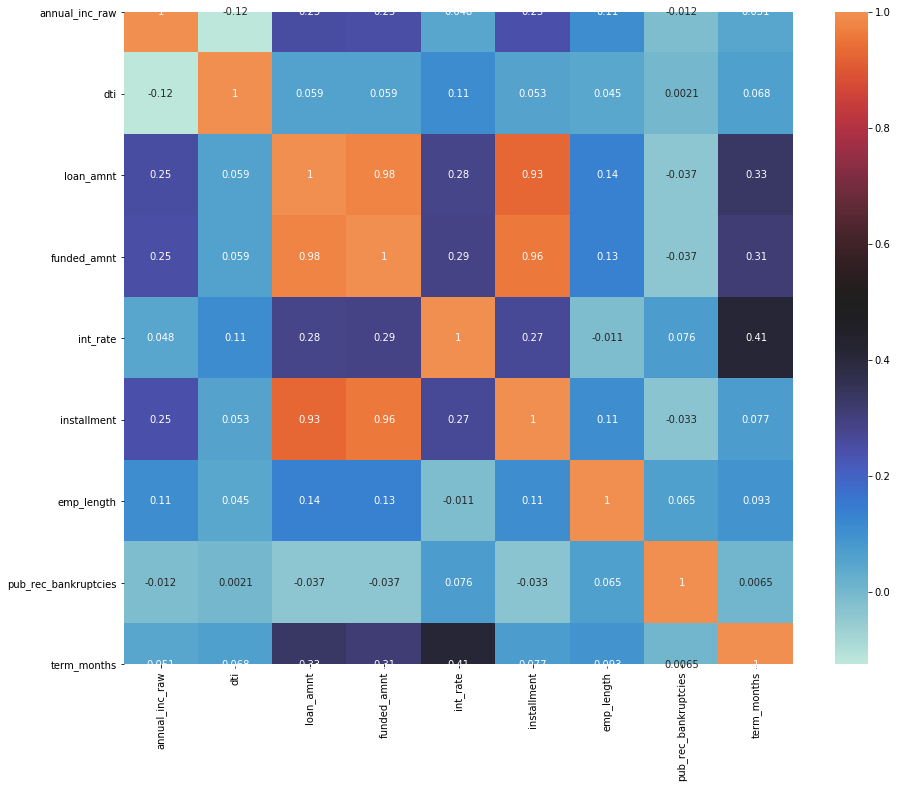

In [964]:
# heatmap of continuous variables for Fully paid
plt.figure(figsize=(15, 12))
continuous_variables = ['annual_inc_raw','dti', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment',
                        'emp_length', 'pub_rec_bankruptcies', 'term_months']
corr = paid_df[continuous_variables].corr()
sns.heatmap(corr, annot=True, center=0.5)